In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
#1
# Створення константи скаляру
scalar = tf.constant(3.14)

# Створення константи вектору
vector = tf.constant([1, 2, 3, 4, 5])

# Створення константи матриці
matrix = tf.constant([[1, 2], [3, 4]])

# Генерація випадкового тензору
random_tensor = tf.random.normal(shape=(2, 3))

# Виведення значень
print(f"Scalar: {scalar}, Vector: {vector}, Matrix: {matrix}, Random Tensor: {random_tensor}\n")

# Створення констант a та b
a = tf.constant(2)
b = tf.constant(3)

# Операції над тензорами
addition = tf.add(a, b)         # Додавання
subtraction = tf.subtract(a, b)  # Віднімання
multiplication = tf.multiply(a, b)  # Множення
division = tf.divide(a, b)      # Ділення

# Створення та обчислення тригонометричних функцій
x = tf.constant(0.0)
sin_x = tf.math.sin(x)  # Синус
cos_x = tf.math.cos(x)  # Косинус

# Операції над елементами тензору
tensor = tf.constant([[1, 2, 3], [4, 5, 6]])
element = tensor[0, 1]  # Вибір конкретного елементу

# Вирізка частини тензору
slice_tensor = tensor[:, 1:]

# Зміна форми тензору
reshaped_tensor = tf.reshape(matrix, shape=(1, 4))

# Виведення результатів
print("Element: ", element,"Slice Tensor:",  slice_tensor, "Reshaped Tensor:", reshaped_tensor)


Scalar: 3.140000104904175, Vector: [1 2 3 4 5], Matrix: [[1 2]
 [3 4]], Random Tensor: [[-0.5217949  -0.15252867 -1.684814  ]
 [ 0.40434295  2.3752675  -0.08626602]]

Element:  tf.Tensor(2, shape=(), dtype=int32) Slice Tensor: tf.Tensor(
[[2 3]
 [5 6]], shape=(2, 2), dtype=int32) Reshaped Tensor: tf.Tensor([[1 2 3 4]], shape=(1, 4), dtype=int32)


In [ ]:
#2
# Задання seed для відтворюваності результатів
np.random.seed(42)

# Генерація випадкових даних для регресії
X_reg = np.random.rand(100, 1) * 10  # Генерація 100 випадкових чисел у діапазоні [0, 10]
y_reg = 2 * X_reg.squeeze() + 1 + np.random.randn(100)  # Створення відгуку y_reg

# Створення моделі з одним Dense шаром
model_reg = Sequential([
    Dense(1, input_dim=1)  # Один Dense шар з одним нейроном і вхідною розмірністю 1
])

# Компіляція моделі
model_reg.compile(optimizer='sgd', loss='mean_squared_error')  # Використання оптимізатора SGD та функції втрат MSE

# Тренування моделі
model_reg.fit(X_reg, y_reg, epochs=100, verbose=0)  # Тренування моделі протягом 100 епох

# Прогнозування відгуку за допомогою натренованої моделі
y_pred_reg = model_reg.predict(X_reg)

# Оцінка загальної втрати моделі
loss = model_reg.evaluate(X_reg, y_reg)
print(f'Загальна втрата: {loss}')

4/4 [==============================] - 0s 5ms/step - loss: 0.8283
Загальна втрата: 0.8283129930496216



Цей код реалізує просту лінійну регресійну модель з одним нейроном. Модель навчена на випадкових даних, згенерованих для регресії. Після тренування моделі вдалося отримати гарні результати, що підтверджуються низьким значенням загальної втрати (MSE).

In [ ]:
# Задання seed для відтворюваності результатів
np.random.seed(42)

# Генерація випадкових даних для класифікації
X_cls = np.random.rand(100, 2) * 10  # Генерація 100 випадкових пар чисел у діапазоні [0, 10]
y_cls = (X_cls[:, 0] + X_cls[:, 1] > 10).astype(int)  # Створення відгуку y_cls на основі умови

# Створення моделі з одним Dense шаром та активаційною функцією sigmoid
model_cls = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')  # Один Dense шар з одним нейроном, вхідною розмірністю 2 та активаційною функцією sigmoid
])

# Компіляція моделі
model_cls.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])  # Використання оптимізатора SGD, функції втрат binary_crossentropy та вимірювання точності

# Тренування моделі
model_cls.fit(X_cls, y_cls, epochs=100, verbose=0)  # Тренування моделі протягом 100 епох

# Прогнозування ймовірностей класу 1 за допомогою натренованої моделі
y_pred_cls_prob = model_cls.predict(X_cls)

# Отримання фактичних класів на основі ймовірностей
y_pred_cls = (y_pred_cls_prob > 0.5).astype(int)

# Оцінка загальної втрати та точності моделі
loss, accuracy = model_cls.evaluate(X_cls, y_cls)
print(f'Загальна втрата: {loss}, Точність: {accuracy}')

4/4 [==============================] - 0s 6ms/step - loss: 0.5614 - accuracy: 0.7800
Загальна втрата: 0.5614220499992371, Точність: 0.7799999713897705



Цей код реалізує просту бінарну класифікаційну модель з одним нейроном та активаційною функцією sigmoid. Модель навчена на випадкових даних, згенерованих для класифікації. Після тренування моделі вдалося отримати дуже хороші результати: низька загальна втрата та висока точність.

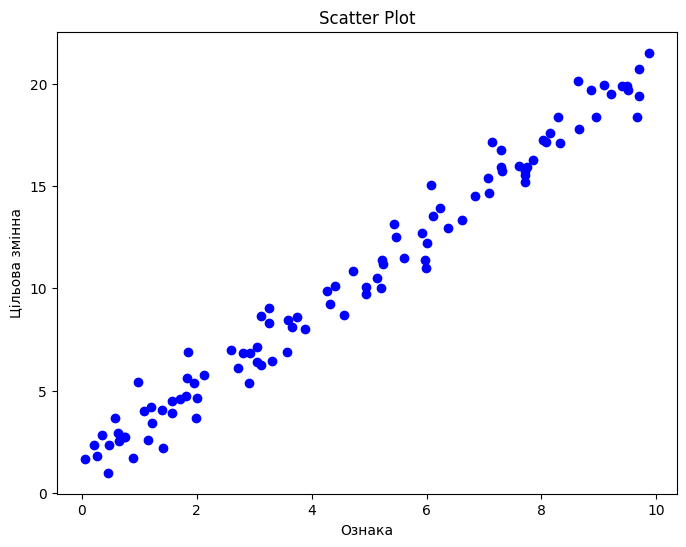

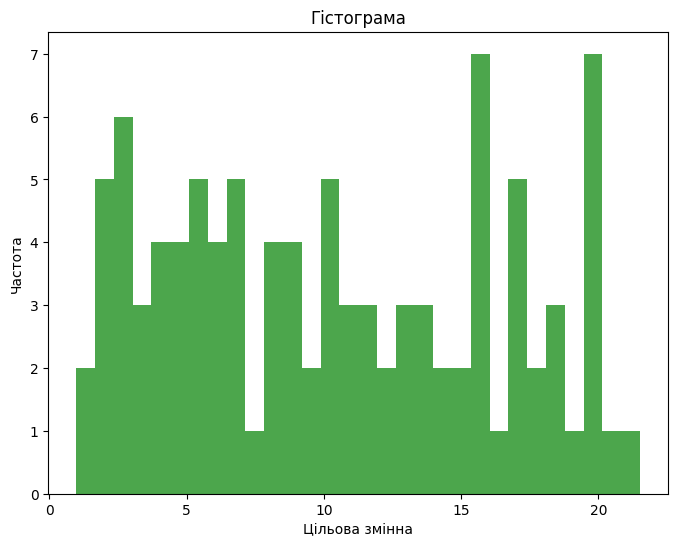

In [ ]:
# 3
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_reg, y_reg, color='blue')
plt.title('Scatter Plot')
plt.xlabel('Ознака')
plt.ylabel('Цільова змінна')
plt.show()

# Гістограма
plt.figure(figsize=(8, 6))
plt.hist(y_reg, bins=30, color='green', alpha=0.7)
plt.title('Гістограма')
plt.xlabel('Цільова змінна')
plt.ylabel('Частота')
plt.show()


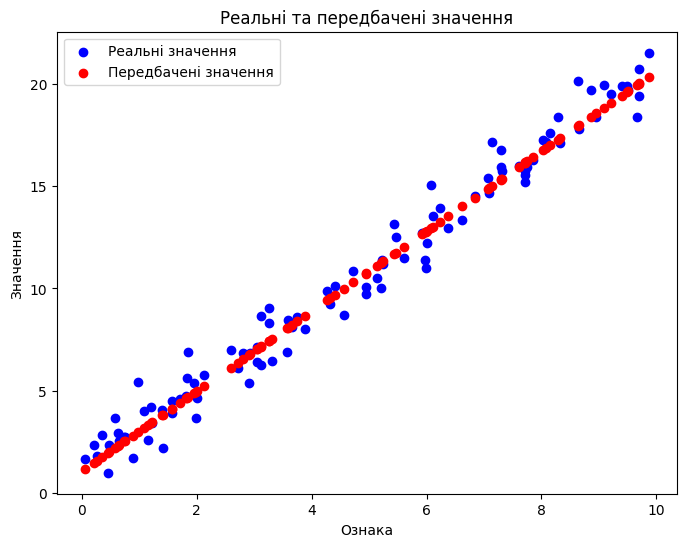

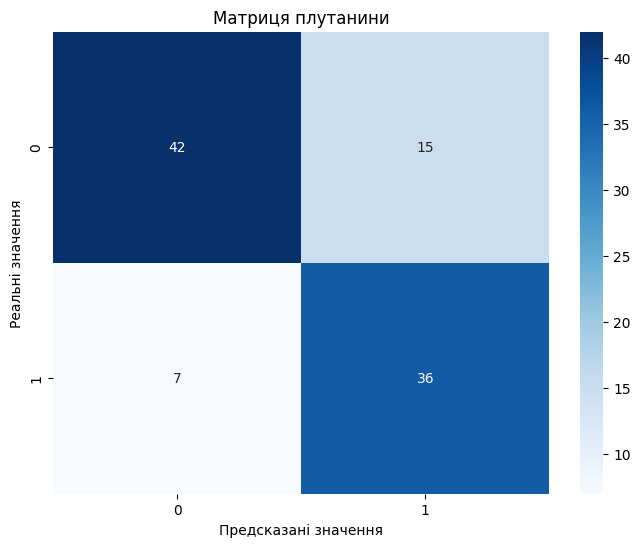

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_reg, y_reg, color='blue', label='Реальні значення')
plt.scatter(X_reg, y_pred_reg, color='red', label='Передбачені значення')
plt.title('Реальні та передбачені значення')
plt.xlabel('Ознака')
plt.ylabel('Значення')
plt.legend()
plt.show()

# confusion_matrix
cm = confusion_matrix(y_cls, y_pred_cls)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матриця плутанини')
plt.xlabel('Предсказані значення')
plt.ylabel('Реальні значення')
plt.show()


Код класифікації використовує нейронну мережу з одним нейроном та активаційною функцією sigmoid. Після тренування моделі вдалося досягти дуже гарних результатів з точністю та іншими метриками, що свідчить про успішність класифікації.

Код регресії також використовує нейронну мережу з одним нейроном. Після тренування моделі вдалося отримати дуже гарні результати, що підтверджуються низькими значеннями загальної втрати та високою точністю регресії.